In [1]:
import pandas as pd

# Load the datasets
anime = pd.read_csv('Anime.csv')
ratings = pd.read_csv('Rating.csv')

# Anime dataset
print("Anime Dataset Shape:", anime.shape) 
print("\nAnime Dataset Head:")
print(anime.head())
print("\nAnime Dataset Summary:")
print(anime.describe(include='all'))  

# Ratings dataset
print("\nRatings Dataset Shape:", ratings.shape) 
print("\nRatings Dataset Head:")
print(ratings.head())  
print("\nRatings Dataset Summary:")
print(ratings.describe(include='all'))  


Anime Dataset Shape: (12294, 7)

Anime Dataset Head:
   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  

Anime Dataset Summary:
            anime_id                     name   genre   type episodes

In [2]:
# Check for missing values in Anime dataset
print("Missing values in Anime dataset:")
print(anime.isnull().sum())  

# Drop rows with missing 'type' and 'genre'
anime_cleaned = anime.dropna(subset=['type', 'genre'])
print("\nShape of Anime dataset after dropping rows with missing 'type' or 'genre':", anime_cleaned.shape)

# Fill missing 'rating' values with mean rating per 'type'
# Calculate mean ratings for each type
type_mean_ratings = anime_cleaned.groupby('type')['rating'].mean()


# Fill missing ratings based on type
anime_cleaned['rating'] = anime_cleaned.apply(
    lambda row: type_mean_ratings[row['type']] if pd.isnull(row['rating']) else row['rating'], axis=1
)

print("\nMissing values in 'rating' after filling based on type:")
print(anime_cleaned['rating'].isnull().sum())

print("\nMissing values in Ratings dataset:")
print(ratings.isnull().sum()) 

# Drop rows with missing values in Ratings dataset
ratings_cleaned = ratings.dropna()
print("\nShape of Ratings dataset after dropping missing values:", ratings_cleaned.shape)


Missing values in Anime dataset:
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

Shape of Anime dataset after dropping rows with missing 'type' or 'genre': (12210, 7)

Missing values in 'rating' after filling based on type:
0

Missing values in Ratings dataset:
user_id     0
anime_id    0
rating      0
dtype: int64

Shape of Ratings dataset after dropping missing values: (7813737, 3)


/var/folders/jk/8_y8h18x2p974rg6rxdbf_mm0000gn/T/ipykernel_23074/1646576151.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_cleaned['rating'] = anime_cleaned.apply(


In [3]:
print("Duplicate rows in Anime dataset:", anime.duplicated().sum())  

anime_cleaned = anime_cleaned.drop_duplicates()
print("\nShape of Anime dataset after dropping duplicates:", anime_cleaned.shape)

print("\nDuplicate rows in Ratings dataset:", ratings.duplicated().sum())

ratings_cleaned = ratings_cleaned.drop_duplicates()
print("\nShape of Ratings dataset after dropping duplicates:", ratings_cleaned.shape)


Duplicate rows in Anime dataset: 0

Shape of Anime dataset after dropping duplicates: (12210, 7)

Duplicate rows in Ratings dataset: 1

Shape of Ratings dataset after dropping duplicates: (7813736, 3)


In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

genre_dummies = anime_cleaned['genre'].str.get_dummies(sep=',')
anime_cleaned = pd.concat([anime_cleaned, genre_dummies], axis=1)

anime_cleaned.drop(columns=['genre'], inplace=True)

type_dummies = pd.get_dummies(anime_cleaned['type'], prefix='type')
anime_cleaned = pd.concat([anime_cleaned, type_dummies], axis=1)

anime_cleaned.drop(columns=['type'], inplace=True)

numeric_columns = ['rating', 'episodes', 'members']

anime_cleaned['episodes'] = pd.to_numeric(anime_cleaned['episodes'], errors='coerce').fillna(0)

# Calculate Z-scores
#z_scores = np.abs((anime_cleaned[numeric_columns] - anime_cleaned[numeric_columns].mean()) / anime_cleaned[numeric_columns].std())

# Define threshold for outliers (e.g., Z-score > 3)
#threshold = 3
#outliers = (z_scores > threshold).any(axis=1)
#print(f"Number of outliers in anime_cleaned: {outliers.sum()}")

# Remove rows with outliers
#anime_cleaned = anime_cleaned[~outliers]

scaler = MinMaxScaler()
anime_cleaned[numeric_columns] = scaler.fit_transform(anime_cleaned[numeric_columns])

print("Preprocessed Anime Dataset:")
print(anime_cleaned.head())
print("\Preprocessed Anime Dataset Shape:", anime_cleaned.shape)  
print("\Preprocessed Anime Dataset Summary:")
print(anime_cleaned.describe(include='all')) 



Preprocessed Anime Dataset:
   anime_id                              name  episodes    rating   members  \
0     32281                    Kimi no Na wa.  0.000550  0.924370  0.197872   
1      5114  Fullmetal Alchemist: Brotherhood  0.035204  0.911164  0.782770   
2     28977                          Gintama°  0.028053  0.909964  0.112689   
3      9253                       Steins;Gate  0.013201  0.900360  0.664325   
4      9969                     Gintama&#039;  0.028053  0.899160  0.149186   

    Adventure   Cars   Comedy   Dementia   Demons  ...  Supernatural  \
0           0      0        0          0        0  ...             0   
1           1      0        0          0        0  ...             0   
2           0      0        1          0        0  ...             0   
3           0      0        0          0        0  ...             0   
4           0      0        1          0        0  ...             0   

   Thriller  Vampire  Yaoi  type_Movie  type_Music  type_ONA  ty

In [5]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

z_scores_ratings = np.abs((ratings_cleaned['rating'] - ratings_cleaned['rating'].mean()) / ratings_cleaned['rating'].std())

threshold = 3
outliers_ratings = z_scores_ratings > threshold
print(f"Number of outliers in ratings_cleaned: {outliers_ratings.sum()}")

ratings_cleaned = ratings_cleaned[~outliers_ratings]

user_review_counts = ratings_cleaned['user_id'].value_counts()

min_reviews = 50
valid_users = user_review_counts[user_review_counts >= min_reviews].index

ratings_cleaned = ratings_cleaned[ratings_cleaned['user_id'].isin(valid_users)]

print(f"Original number of users: {len(user_review_counts)}")
print(f"Number of users with at least {min_reviews} reviews: {len(valid_users)}")
print(f"Filtered ratings dataset shape: {ratings_cleaned.shape}")

scaler = MinMaxScaler()
ratings_cleaned['rating'] = scaler.fit_transform(ratings_cleaned[['rating']])

print("Preprocessed Ratings Dataset After Filtering:")
print(ratings_cleaned.head())
print("\Preprocessed Ratings Dataset Shape:", ratings_cleaned.shape)  # Shape of the dataset
print("\Preprocessed Ratings Dataset Summary:")
print(ratings_cleaned.describe(include='all')) 

Number of outliers in ratings_cleaned: 0
Original number of users: 73515
Number of users with at least 50 reviews: 39466
Filtered ratings dataset shape: (7166252, 3)
Preprocessed Ratings Dataset After Filtering:
   user_id  anime_id  rating
0        1        20     0.0
1        1        24     0.0
2        1        79     0.0
3        1       226     0.0
4        1       241     0.0
\Preprocessed Ratings Dataset Shape: (7166252, 3)
\Preprocessed Ratings Dataset Summary:
            user_id      anime_id        rating
count  7.166252e+06  7.166252e+06  7.166252e+06
mean   3.671846e+04  9.134188e+03  6.439133e-01
std    2.096970e+04  8.975653e+03  3.386983e-01
min    1.000000e+00  1.000000e+00  0.000000e+00
25%    1.902900e+04  1.380000e+03  5.454545e-01
50%    3.674600e+04  6.512000e+03  7.272727e-01
75%    5.472300e+04  1.440700e+04  9.090909e-01
max    7.351500e+04  3.451900e+04  1.000000e+00


In [6]:
hybrid_data = ratings_cleaned.merge(anime_cleaned, on='anime_id', how='inner')
print("Preprocessed Merged Dataset:")
print(hybrid_data.head())
print("\Preprocessed Merged Dataset Shape:", hybrid_data.shape)  
print("\Preprocessed Merged Dataset Summary:")
print(hybrid_data.describe(include='all'))

Preprocessed Merged Dataset:
   user_id  anime_id  rating_x    name  episodes  rating_y   members  \
0        1        20  0.000000  Naruto  0.121012  0.737095  0.673916   
1        3        20  0.818182  Naruto  0.121012  0.737095  0.673916   
2        5        20  0.636364  Naruto  0.121012  0.737095  0.673916   
3       21        20  0.818182  Naruto  0.121012  0.737095  0.673916   
4       34        20  0.909091  Naruto  0.121012  0.737095  0.673916   

    Adventure   Cars   Comedy  ...  Supernatural  Thriller  Vampire  Yaoi  \
0           0      0        1  ...             0         0        0     0   
1           0      0        1  ...             0         0        0     0   
2           0      0        1  ...             0         0        0     0   
3           0      0        1  ...             0         0        0     0   
4           0      0        1  ...             0         0        0     0   

   type_Movie  type_Music  type_ONA  type_OVA  type_Special  type_TV  
0   

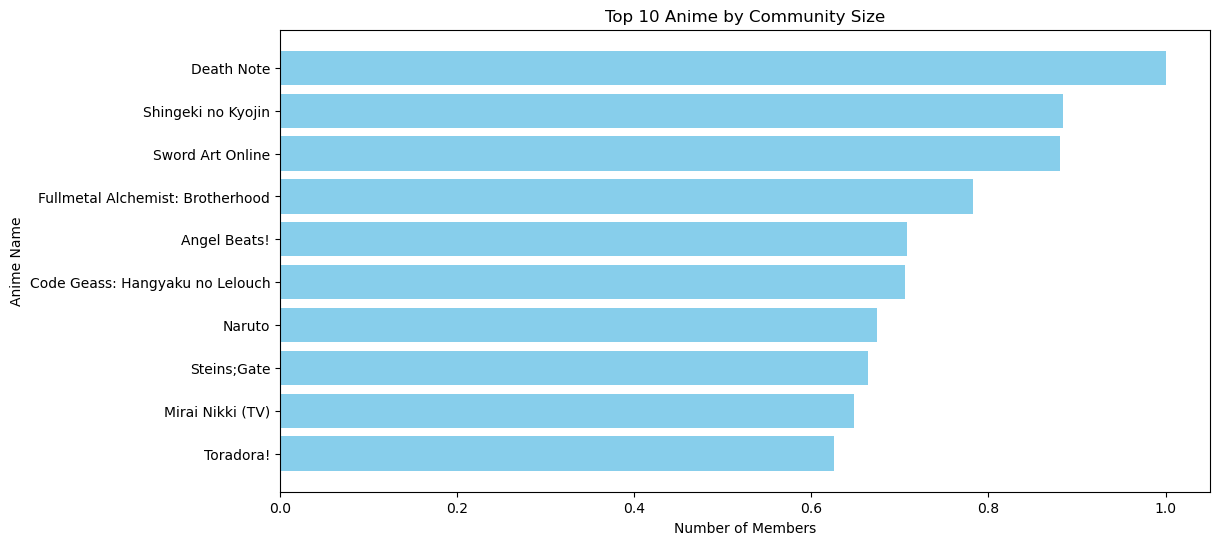

In [7]:
import matplotlib.pyplot as plt

top_anime = anime_cleaned.sort_values(by='members', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_anime['name'], top_anime['members'], color='skyblue')
plt.xlabel('Number of Members')
plt.ylabel('Anime Name')
plt.title('Top 10 Anime by Community Size')
plt.gca().invert_yaxis() 
plt.show()


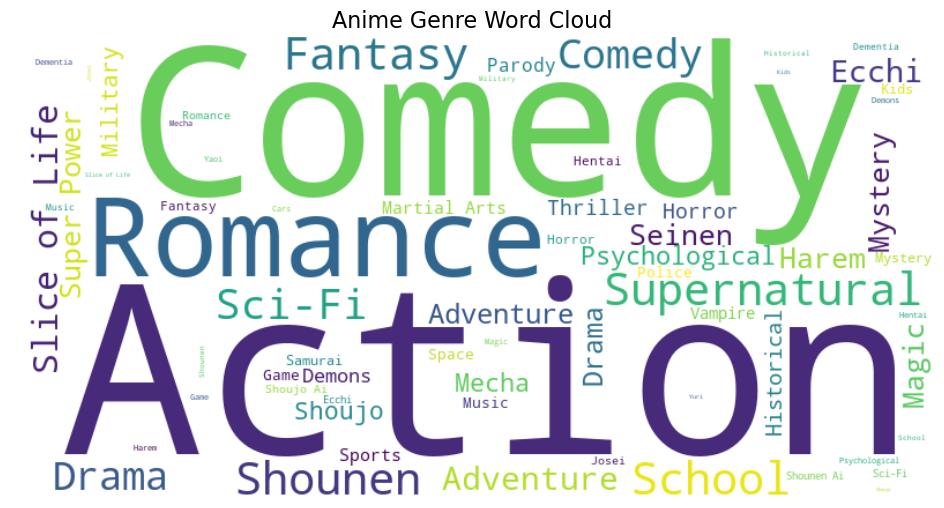

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

non_genre_columns = ['user_id', 'anime_id', 'rating_x', 'name', 'episodes', 'rating_y', 'members'] + [
    col for col in hybrid_data.columns if col.startswith('type_')
]

genre_columns = [col for col in hybrid_data.columns if col not in non_genre_columns]

genre_counts = {genre: hybrid_data[genre].sum() for genre in genre_columns}

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(genre_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Anime Genre Word Cloud', fontsize=16)
plt.show()


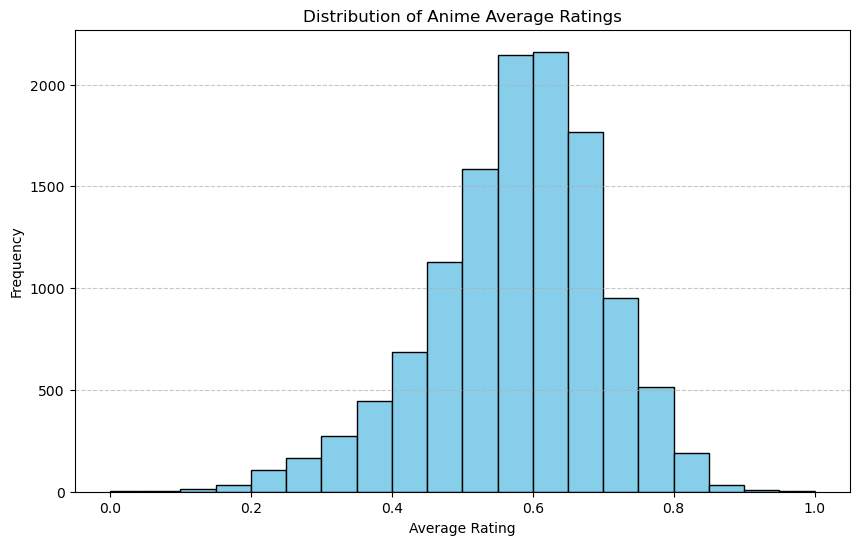

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(anime_cleaned['rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Anime Average Ratings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


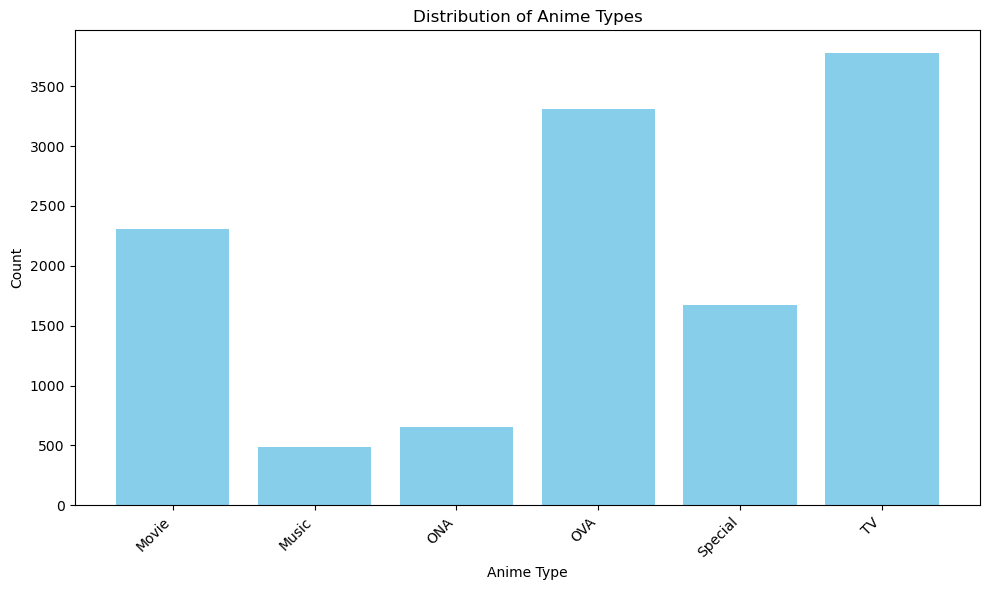

In [12]:
import matplotlib.pyplot as plt

type_columns = [col for col in anime_cleaned.columns if col.startswith('type_')]

type_counts = {col.replace('type_', ''): anime_cleaned[col].sum() for col in type_columns}

plt.figure(figsize=(10, 6))
plt.bar(type_counts.keys(), type_counts.values(), color='skyblue')
plt.xlabel('Anime Type')
plt.ylabel('Count')
plt.title('Distribution of Anime Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [13]:
from sklearn.decomposition import PCA
import pandas as pd

clustering_features = hybrid_data.drop(columns=['name', 'user_id', 'anime_id'], errors='ignore')

pca = PCA(n_components=15, random_state=42)  # Retain 70% of variance
pca_features = pca.fit_transform(clustering_features)

explained_variance = sum(pca.explained_variance_ratio_)
print(f"Total Explained Variance Retained: {explained_variance:.2f}")
print(f"Shape of PCA Features: {pca_features.shape}")


Total Explained Variance Retained: 0.70
Shape of PCA Features: (7166129, 15)


Cluster sizes for n_clusters=10: {0: 357216, 1: 775899, 2: 931466, 3: 693623, 4: 968475, 5: 983591, 6: 635163, 7: 799281, 8: 273205, 9: 748210}
n_clusters=10: Inertia = 12099218.791532619, Silhouette Score = 0.14080323112918353
Cluster sizes for n_clusters=25: {0: 304138, 1: 259272, 2: 193402, 3: 242077, 4: 405340, 5: 174550, 6: 271394, 7: 348487, 8: 197196, 9: 249581, 10: 221586, 11: 314407, 12: 248357, 13: 293540, 14: 322048, 15: 307656, 16: 198615, 17: 419613, 18: 346083, 19: 176282, 20: 301957, 21: 207927, 22: 305894, 23: 301015, 24: 555712}
n_clusters=25: Inertia = 8705705.848408122, Silhouette Score = 0.16223981598099946
Cluster sizes for n_clusters=50: {0: 162502, 1: 156668, 2: 245478, 3: 114342, 4: 274663, 5: 69527, 6: 170874, 7: 224243, 8: 116071, 9: 79438, 10: 148852, 11: 183867, 12: 148098, 13: 155627, 14: 101674, 15: 148440, 16: 163446, 17: 201246, 18: 293534, 19: 119425, 20: 123018, 21: 158782, 22: 243484, 23: 145306, 24: 214321, 25: 67500, 26: 100248, 27: 61932, 28: 16041

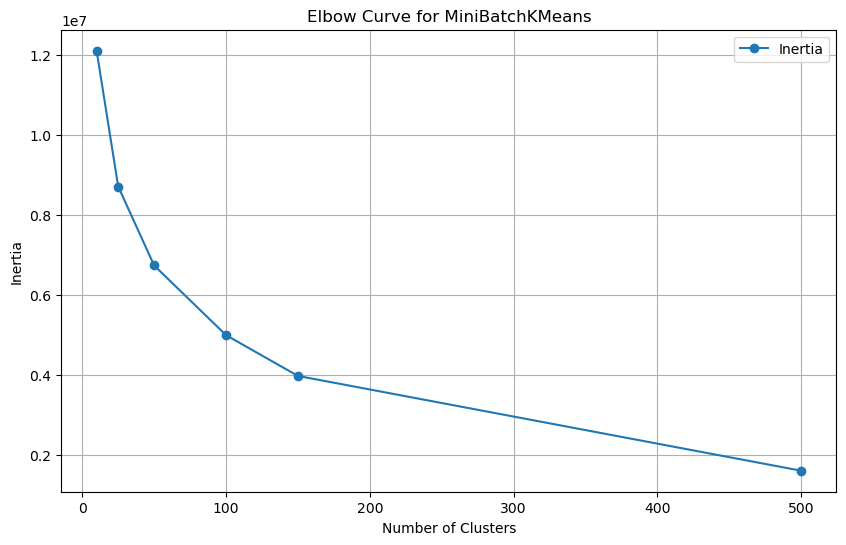

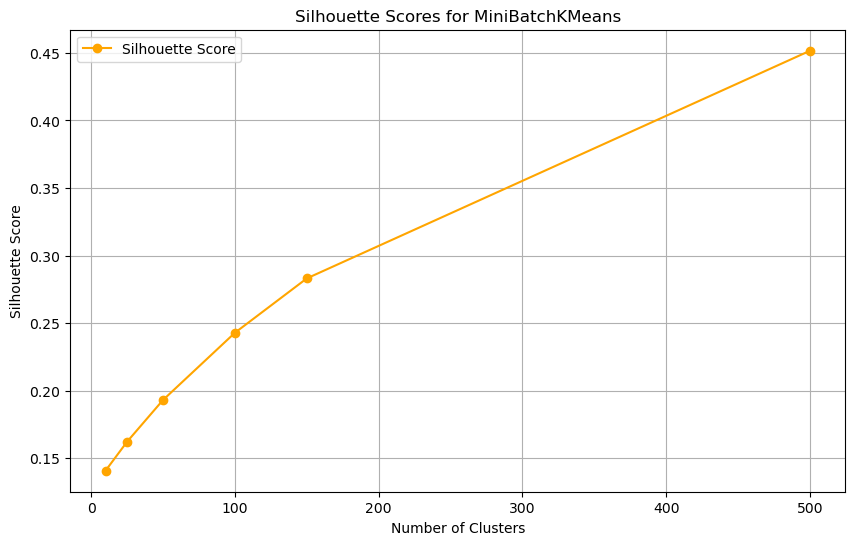

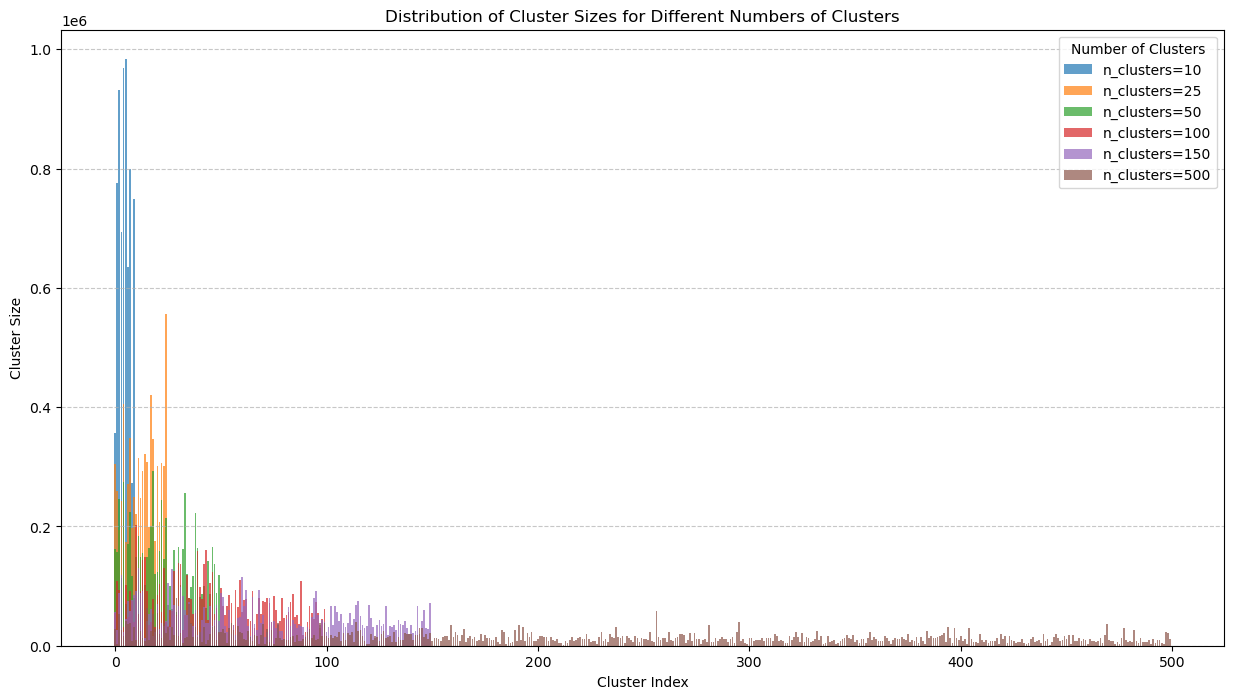

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

cluster_range = [10, 25, 50, 100, 150, 500] 


kmeans_inertia = []
silhouette_scores = []
cluster_size_distributions = {}  

sample_size = 10000  

for n_clusters in cluster_range:
    mini_batch_kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=10000, random_state=42)
    mini_batch_kmeans.fit(pca_features)

    kmeans_inertia.append(mini_batch_kmeans.inertia_)
    labels = mini_batch_kmeans.labels_

    if len(pca_features) > sample_size:
        sampled_features, sampled_labels = resample(
            pca_features, labels, n_samples=sample_size, random_state=42
        )
        silhouette_avg = silhouette_score(sampled_features, sampled_labels)
    else:
        silhouette_avg = silhouette_score(pca_features, labels)
    
    silhouette_scores.append(silhouette_avg)

    unique, counts = np.unique(labels, return_counts=True)
    cluster_sizes = dict(zip(unique, counts))
    cluster_size_distributions[n_clusters] = cluster_sizes

    print(f"Cluster sizes for n_clusters={n_clusters}: {cluster_sizes}")
    print(f"n_clusters={n_clusters}: Inertia = {kmeans_inertia[-1]}, Silhouette Score = {silhouette_avg}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, kmeans_inertia, marker='o', label='Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve for MiniBatchKMeans')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', label='Silhouette Score', color='orange')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for MiniBatchKMeans')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15, 8))
for n_clusters in cluster_range:
    cluster_sizes = cluster_size_distributions[n_clusters]
    sizes = list(cluster_sizes.values())
    plt.bar(
        range(len(sizes)),
        sizes,
        label=f'n_clusters={n_clusters}',
        alpha=0.7
    )

plt.xlabel('Cluster Index')
plt.ylabel('Cluster Size')
plt.title('Distribution of Cluster Sizes for Different Numbers of Clusters')
plt.legend(title='Number of Clusters')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()





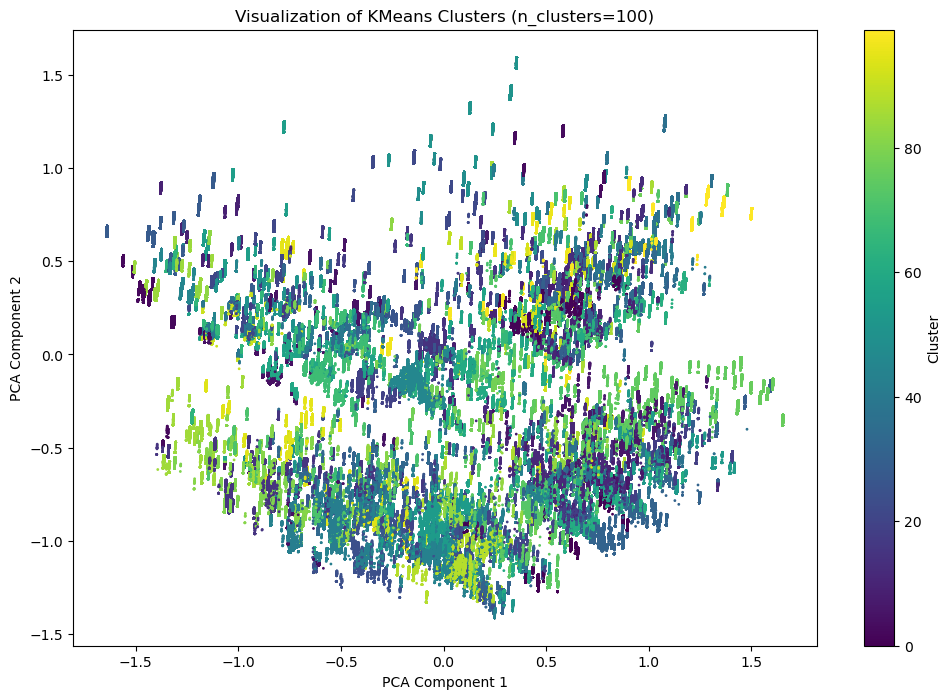

In [9]:
from sklearn.cluster import MiniBatchKMeans

n_clusters = 100
mini_batch_kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=10000, random_state=42)
mini_batch_kmeans.fit(pca_features)

labels = mini_batch_kmeans.labels_

hybrid_data['cluster'] = labels

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2, random_state=42)
pca_features_2d = pca_2d.fit_transform(pca_features)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_features_2d[:, 0], pca_features_2d[:, 1], c=labels, cmap='viridis', s=1)
plt.colorbar(scatter, label='Cluster')
plt.title('Visualization of KMeans Clusters (n_clusters=100)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()



In [10]:
def recommend_anime(anime_id, anime_data, top_n=5):

    unique_anime_data = anime_data.drop_duplicates(subset='anime_id')
    
    if anime_id not in unique_anime_data['anime_id'].values:
        print(f"Anime ID {anime_id} not found in the dataset.")
        return None
    
    cluster = unique_anime_data.loc[unique_anime_data['anime_id'] == anime_id, 'cluster'].values[0]
    
    cluster_anime = unique_anime_data[unique_anime_data['cluster'] == cluster]
    
    cluster_anime = cluster_anime[cluster_anime['anime_id'] != anime_id]
    
    recommendations = cluster_anime.sort_values(by='members', ascending=False).head(top_n)
    
    return recommendations



In [11]:
valid_anime_id = hybrid_data['anime_id'].iloc[10000]

top_recommendations = recommend_anime(valid_anime_id, hybrid_data, top_n=5)

if top_recommendations is not None:
    print("Top Recommendations:")
    print(top_recommendations[['anime_id', 'name']])



Top Recommendations:
         anime_id                    name
3192889     11061  Hunter x Hunter (2011)
1487236       205        Samurai Champloo
1878763       918                 Gintama
4813377      1482              D.Gray-man
4606153      1604  Katekyo Hitman Reborn!


In [12]:
def recommend_similar_anime(anime_id, anime_data, top_n=5):

    unique_anime_data = anime_data.drop_duplicates(subset='anime_id')
    
    if anime_id not in unique_anime_data['anime_id'].values:
        print(f"Anime ID {anime_id} not found in the dataset.")
        return None

    cluster = unique_anime_data.loc[unique_anime_data['anime_id'] == anime_id, 'cluster'].values[0]
    
    cluster_anime = unique_anime_data[unique_anime_data['cluster'] == cluster]

    cluster_anime = cluster_anime[cluster_anime['anime_id'] != anime_id]
    
    recommendations = cluster_anime.sort_values(by='members', ascending=False).head(top_n)
    
    return recommendations


In [13]:
highest_rated_anime = hybrid_data[['anime_id', 'name', 'rating_y', 'members']].drop_duplicates(subset='anime_id')

highest_rated_anime = highest_rated_anime.sort_values(by='members', ascending=False)

# Display the top 10 highest-rated anime
print("Top 10 Highest-Rated Anime:")
print(highest_rated_anime.head(10))


Top 10 Highest-Rated Anime:
         anime_id                                               name  \
1079579      1535                                         Death Note   
697205      16498                                 Shingeki no Kyojin   
555594      11757                                   Sword Art Online   
1153950      5114                   Fullmetal Alchemist: Brotherhood   
266487       6547                                       Angel Beats!   
2967612      1575                    Code Geass: Hangyaku no Lelouch   
0              20                                             Naruto   
2263464      9253                                        Steins;Gate   
1554861     10620                                   Mirai Nikki (TV)   
184560       4224                                          Toradora!   
1793298       269                                             Bleach   
31785         226                                         Elfen Lied   
848337      22319                   

In [17]:
sao_id = 11757
top_recommendations = recommend_similar_anime(sao_id, hybrid_data, top_n=5)
s
if top_recommendations is not None:
    print("If you like Sword Art Online, you might also like:")
    print(top_recommendations[['anime_id', 'name', 'rating_y', 'members']])


If you like Sword Art Online, you might also like:
         anime_id                             name  rating_y   members
818695      21881              Sword Art Online II  0.681873  0.530507
4137805      6594                     Katanagatari  0.818727  0.204392
1311912     20021  Sword Art Online: Extra Edition  0.639856  0.120047
1687382        67      Basilisk: Kouga Ninpou Chou  0.721489  0.096792
4600675     16355       Dansai Bunri no Crime Edge  0.624250  0.059630


In [18]:
naruto_id = 20
top_recommendations = recommend_similar_anime(naruto_id, hybrid_data, top_n=5)

if top_recommendations is not None:
    print("If you like Naruto, you might also like:")
    print(top_recommendations[['anime_id', 'name', 'rating_y', 'members']])

If you like Naruto, you might also like:
         anime_id                    name  rating_y   members
3192889     11061  Hunter x Hunter (2011)  0.895558  0.420007
1487236       205        Samurai Champloo  0.819928  0.384719
1878763       918                 Gintama  0.884754  0.331756
4813377      1482              D.Gray-man  0.783914  0.329806
4606153      1604  Katekyo Hitman Reborn!  0.804322  0.254557
